In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/New_York_Taxi_Analysis/data/yellow_tripdata_2019-01.csv")

## 1. Data Exploration

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [5]:
df.shape

(7667792, 18)

In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


### Checking for missing values & outliers

In [7]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4855978
dtype: int64

##### Keep columns that are relevant to the taxi_fare

In [8]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [9]:
taxi_data = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 
                'passenger_count','PULocationID', 'DOLocationID','RatecodeID',
                'trip_distance', 'payment_type', 'total_amount']]

In [10]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,RatecodeID,trip_distance,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,151,239,1,1.5,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,239,246,1,2.6,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,236,236,1,0.0,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,193,193,1,0.0,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,193,193,2,0.0,2,55.55


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22d23b7ef0>,
      dtype=object)

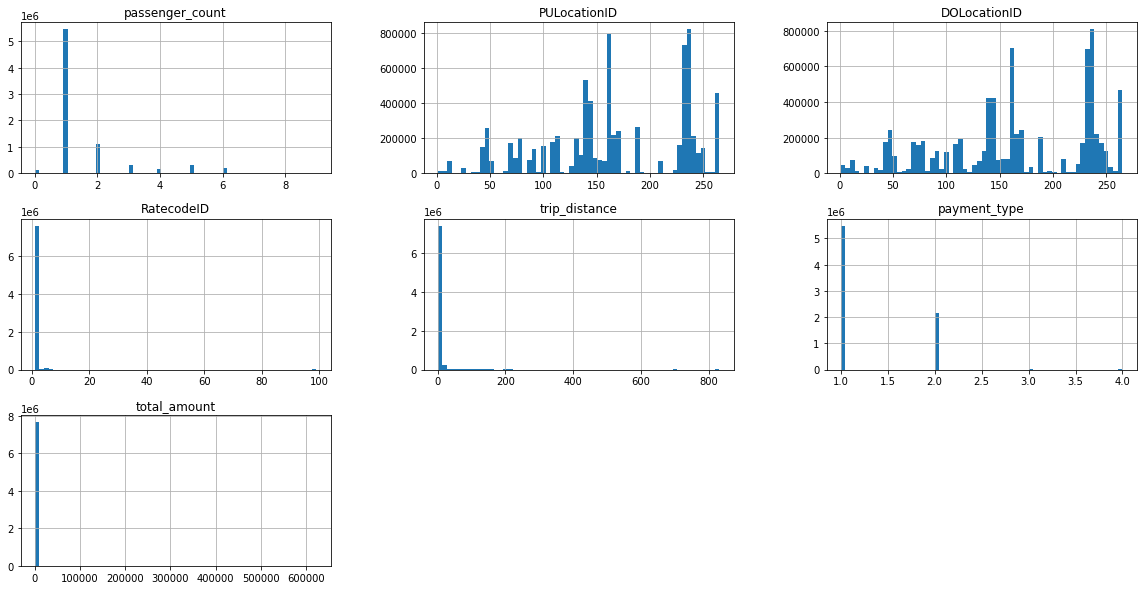

In [11]:
taxi_data.hist(figsize=(20,10), bins=60)

#### The data distribution above shows some potential problem in the data. This problem is obvious in the total_amount plot. It is absurd to assume a passenger would pay up to 600,000 for a taxi fare

In [12]:
taxi_data['RatecodeID'].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

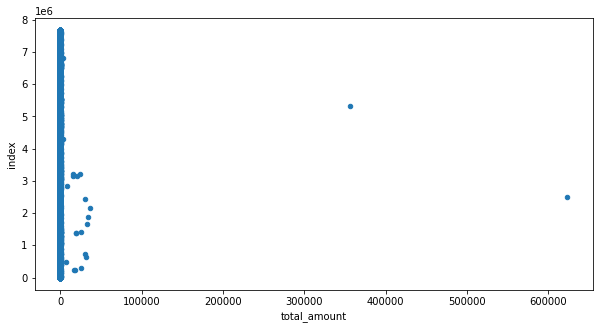

In [13]:
taxi_data['total_amount'].reset_index().plot.scatter(x ='total_amount', y ='index', figsize=(10,5))

##### we observe that there are certain datapoints with outrageous prices.This show that there's a problem in our data
##### Also most of our data lie between 0 & 100,000. We would visualize that part of the data alone to get a better understanding of our data

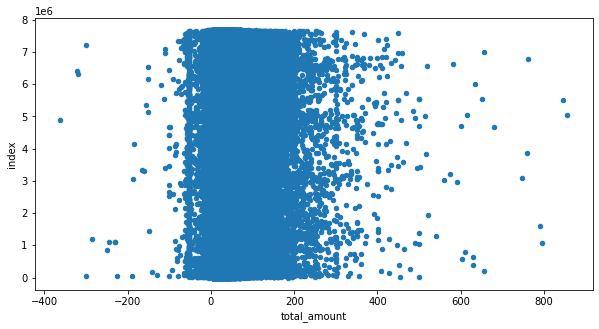

In [14]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot.scatter(x ='total_amount', y ='index', figsize=(10,5))

##### Our second plot shows us that there are negative datapoints which is unusual because a taxi-fare shouldn't come with a negative charge. This is a data problem that should be fixed

#### Visualizing the negative values problem

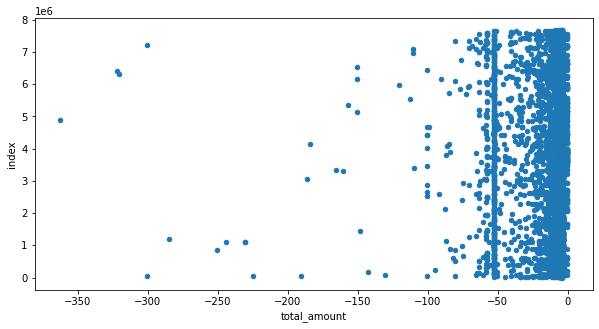

In [15]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot.scatter(x = 'total_amount', y='index', figsize=(10,5))

In [16]:
taxi_data[taxi_data['total_amount']<0].shape

(7131, 9)

#### 7,131 datapoints out of over 7 million data records contain negative fare prices
###### At this point I might  decide to delete the data since it won't count as a great loss or I might explore further to see if there's anything other insight that can be uncovered 

###### (In a real-world scenario. I would discuss this with the client (if I'm working with one) or do some further survey to find out why something like this might occur)

In [17]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,RatecodeID,trip_distance,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,148,148,1,0.10,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,170,238,1,4.13,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,162,234,1,1.35,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,234,234,1,0.00,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,234,234,1,0.16,4,-4.3


In [18]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

###### Majority of the payment options fall on 3 & 4 which represents "No charge & Dispute"

In [19]:
#taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(figsize=(10,5),bins=60)

######  The visulisation shows that majority of the trips with negative values have a trip distance of zero miles which explains to an extent why there might be a negative value. maybe the passenger already paid for the ride and they had to refund because he didn't end up taking the trip (this is an assumption)

###### Asides negative values I also want to make sure that there's no "zero" fare amount in our data. This wouldn't make any sense to our model and might cause problems

In [20]:
taxi_data[taxi_data['total_amount']==0].shape

(1414, 9)

In [21]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

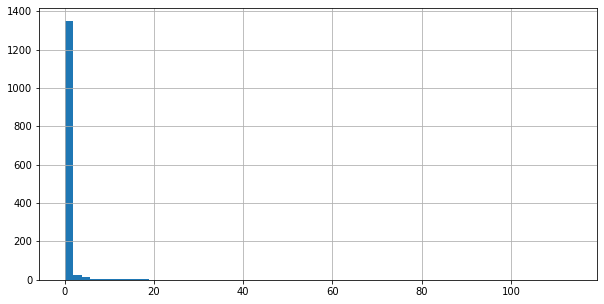

In [22]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(figsize=(10,5), bins=60)

###### The exploration above shows that there are 1414 data points with zero fare amount. Majority of them fall under credit card and cash payment type and they are trips that have zero miles in travel distance

###### I'll delete the negative and zero fare amounts as they are very small in amount compared to the total data and also because keeping would cause my model to perform badly

## 2. Data Cleaning
###### Solving the high value issues by removing extremely high [total_amount] rows

In [23]:
#taxi_data['total_amount'].reset_index().plot.scatter(x ='total_amount', y ='index', figsize=(10,5))

In [24]:
taxi_data[taxi_data['total_amount']<100].shape

(7656905, 9)

In [25]:
taxi_data[taxi_data['total_amount']> 200].shape

(1166, 9)

###### most of the fare amount lies under 100 dollars so I've decided to set 200 dollars as the bench mark for the highest fare price

In [26]:
taxi_data['total_amount'].mean()
# average taxi fare

15.68222215901336

In [27]:
filtered_data = taxi_data[(taxi_data.total_amount > 0) & (taxi_data.total_amount <= 200)]

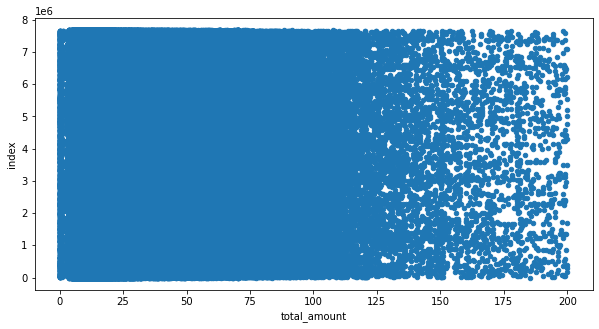

In [28]:
filtered_data['total_amount'].reset_index().plot.scatter(x='total_amount', y='index', figsize=(10,5))

In [29]:
filtered_data.shape

(7658081, 9)

In [30]:
filtered_data.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
PULocationID             0
DOLocationID             0
RatecodeID               0
trip_distance            0
payment_type             0
total_amount             0
dtype: int64

## 3. Data Preparation

###### Data preparation and information extraction
###### Most of the input features are in type(int) but they represent categorical features. They'll be changed to type(str)

In [31]:
prepared_data = filtered_data.copy()

In [32]:
prepared_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,RatecodeID,trip_distance,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,151,239,1,1.5,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,239,246,1,2.6,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,236,236,1,0.0,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,193,193,1,0.0,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,193,193,2,0.0,2,55.55


In [33]:
prepared_data['tpep_pickup_datetime'] =  pd.to_datetime(prepared_data['tpep_pickup_datetime'])

In [34]:
prepared_data['tpep_dropoff_datetime'] =  pd.to_datetime(prepared_data['tpep_dropoff_datetime'])

In [35]:
prepared_data['payment_type'] = prepared_data['payment_type'].astype(str)

In [36]:
prepared_data['PULocationID'] = prepared_data['PULocationID'].astype(str)

In [37]:
prepared_data['DOLocationID'] = prepared_data['DOLocationID'].astype(str)

In [38]:
prepared_data['RatecodeID'] = prepared_data['RatecodeID'].astype(str)

In [39]:
prepared_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
PULocationID                     object
DOLocationID                     object
RatecodeID                       object
trip_distance                   float64
payment_type                     object
total_amount                    float64
dtype: object

###### Extracting extra information from the date column

In [40]:
prepared_data['transaction_date'] = prepared_data['tpep_pickup_datetime'].dt.date

In [41]:
prepared_data['transaction_year'] = prepared_data['tpep_pickup_datetime'].dt.year

In [42]:
prepared_data['transaction_month'] = prepared_data['tpep_pickup_datetime'].dt.month

In [43]:
prepared_data['transaction_day'] = prepared_data['tpep_pickup_datetime'].dt.day

In [44]:
prepared_data['transaction_hour'] = prepared_data['tpep_pickup_datetime'].dt.hour

In [45]:
prepared_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,RatecodeID,trip_distance,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,151,239,1,1.5,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,239,246,1,2.6,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,236,236,1,0.0,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,193,193,1,0.0,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,193,193,2,0.0,2,55.55,2018-11-28,2018,11,28,15


In [46]:
prepared_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
PULocationID                     object
DOLocationID                     object
RatecodeID                       object
trip_distance                   float64
payment_type                     object
total_amount                    float64
transaction_date                 object
transaction_year                  int64
transaction_month                 int64
transaction_day                   int64
transaction_hour                  int64
dtype: object

######  Other months and year asides January & 2019  would be taken off to make sure we are left with only data from January 2019

In [47]:
prepared_data = prepared_data[prepared_data['transaction_year'] == 2019]

In [48]:
prepared_data = prepared_data[prepared_data['transaction_month'] == 1]

###### Selecting features to be used to in the model

In [49]:
categorical = ['PULocationID', 'transaction_date','transaction_day', 'transaction_hour']
numerical = ['trip_distance', 'total_amount']

In [50]:
needed_columns = categorical + numerical
taxi_model_df = prepared_data[needed_columns]
taxi_model_df.head()

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,0,1.5,9.95
1,239,2019-01-01,1,0,2.6,16.30
7,163,2019-01-01,1,0,1.3,9.05
8,229,2019-01-01,1,0,3.7,18.50
9,141,2019-01-01,1,0,2.1,13.00


###### Grouping the taxi data by region, date, and hour

In [51]:
taxi_grp_per_region = taxi_model_df.groupby(categorical).mean().reset_index()

In [52]:
taxi_grp_per_region['total_transactions'] = taxi_model_df.groupby(categorical).count().reset_index()['total_amount']

In [53]:
taxi_grp_per_region.head()

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount,total_transactions
0,1,2019-01-01,1,2,0.0,21.800,1
1,1,2019-01-01,1,5,0.0,87.300,1
2,1,2019-01-01,1,6,0.0,80.300,1
3,1,2019-01-01,1,8,0.0,128.580,2
4,1,2019-01-01,1,10,16.9,43.245,4


## 4. Benchmark model creation and Evaluation

In [54]:
data_bench_model = taxi_grp_per_region.copy()

In [55]:
data_bench_model.shape

(102521, 7)

In [56]:
categorical_features = ['PULocationID','transaction_day', 'transaction_hour']
input_features = categorical_features + ['trip_distance']
target_feature = ['total_amount']

#### Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split

x_bench = data_bench_model[input_features]
y_bench = data_bench_model[target_feature]

# one-hot encoding

x_bench = pd.get_dummies(x_bench)
x_train, x_test, y_train, y_test = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

#### Fitting the data into the model

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Model Evaluation

In [59]:
bench_model = tree

y_pred = bench_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test, y_pred))

Mean absolute error: 3.3810712800717186
Mean squared error: 63.50423322906508
Root mean squared error: 7.9689543372430665
r2 score: 0.7695540930560768


###### Model seems to fit too well and that was caused by a leakage in the data. The [trip_distance] feature is highly correlated with the target feature

#### Visualizing the results

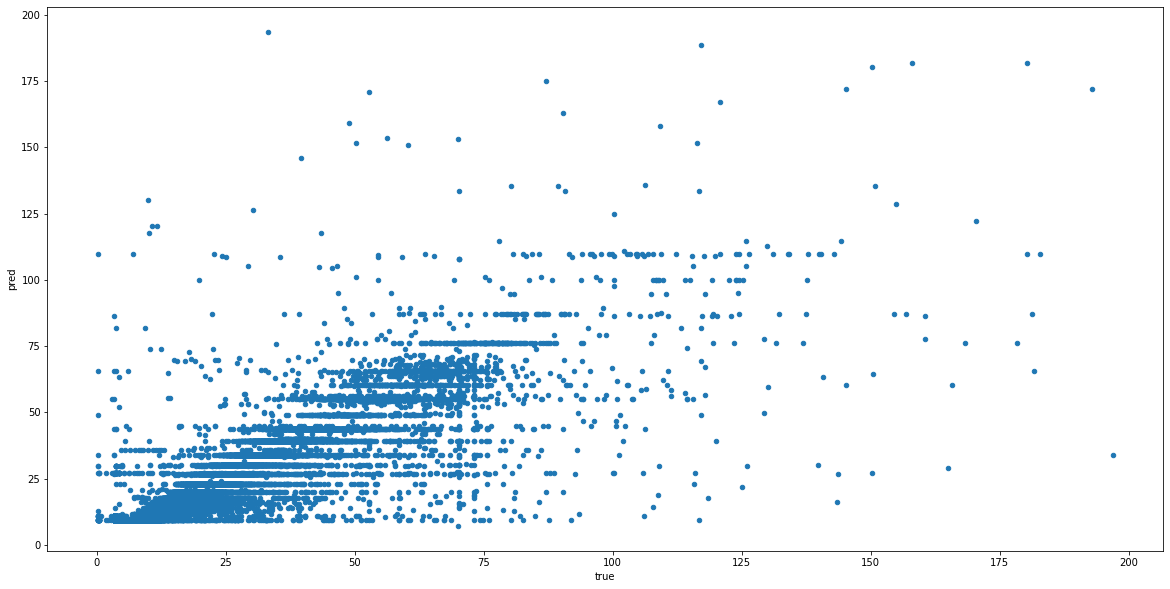

In [60]:
pred = pd.DataFrame(data=y_pred.flatten())
y_test = y_test.reset_index(drop=True)
result = y_test.join(pred, how='outer')
result = result.rename(columns={"total_amount": "true", 0: "pred"})
result.plot.scatter(x='true', y='pred', figsize=(20,10))

#### Fixing the Problem

###### I remove the [trip distance] feature because it is highly correlated with the [total amount]

In [61]:
categorical_features = ['PULocationID','transaction_day', 'transaction_hour']
input_features = categorical_features
target_feature = ['total_amount']

from sklearn.model_selection import train_test_split

x_bench = data_bench_model[input_features]
y_bench = data_bench_model[target_feature]

# one-hot encoding

x_bench = pd.get_dummies(x_bench)
x_train, x_test, y_train, y_test = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train, y_train)

bench_model = tree

y_pred = bench_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test, y_pred))

Mean absolute error: 9.759289426081596
Mean squared error: 216.2220776348906
Root mean squared error: 14.704491750308495
r2 score: 0.2153673818540598


###### The results looks more like what I should expect from a first, non-tuned model

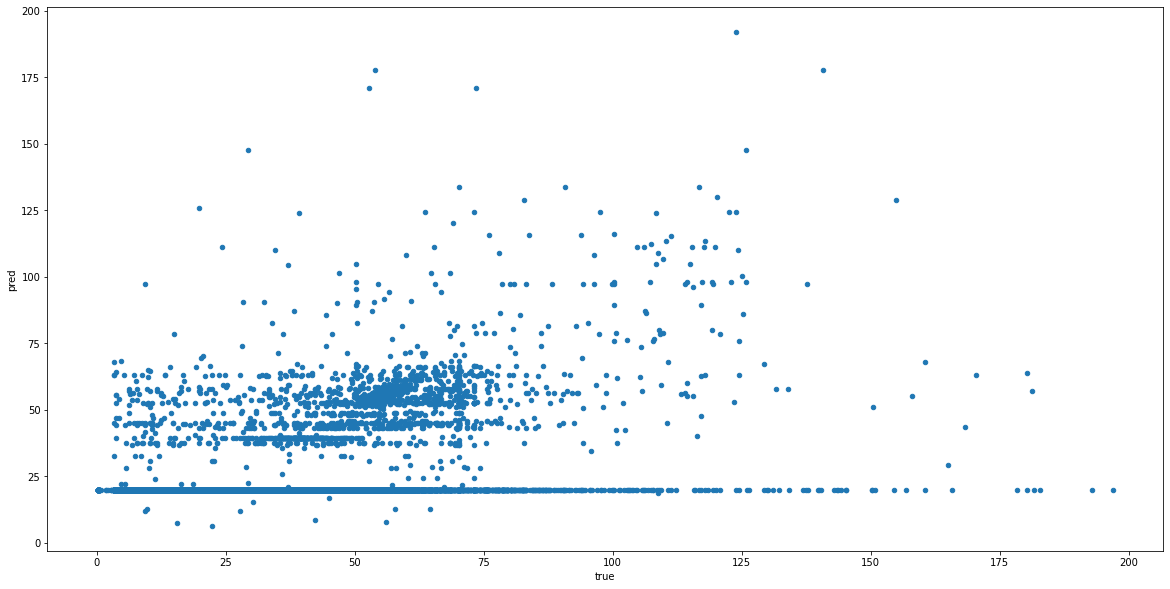

In [62]:
pred = pd.DataFrame(data=y_pred.flatten())
y_test = y_test.reset_index(drop=True)
result = y_test.join(pred, how='outer')
result = result.rename(columns={"total_amount": "true", 0: "pred"})
result.plot.scatter(x='true', y='pred', figsize=(20,10))

## 5. Feature Engineering

###### To improve the model performance, I added new features and data

In [63]:
taxi_grp_per_region.head()

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount,total_transactions
0,1,2019-01-01,1,2,0.0,21.800,1
1,1,2019-01-01,1,5,0.0,87.300,1
2,1,2019-01-01,1,6,0.0,80.300,1
3,1,2019-01-01,1,8,0.0,128.580,2
4,1,2019-01-01,1,10,16.9,43.245,4


In [64]:
taxi_new_features = taxi_grp_per_region.copy()

###### Date-related features

In [65]:
taxi_new_features['transaction_date'] = pd.to_datetime(taxi_new_features['transaction_date'])
taxi_new_features['weekday'] = taxi_new_features['transaction_date'].dt.weekday

In [66]:
taxi_new_features['weekend'] = taxi_new_features['weekday'].apply(lambda x: True if x == 5 or x == 6 else False)

In [67]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018', end='2020').date
taxi_new_features['is_holiday'] = taxi_new_features['transaction_date'].isin(holidays)

In [68]:
taxi_new_features.head()

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount,total_transactions,weekday,weekend,is_holiday
0,1,2019-01-01,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,10,16.9,43.245,4,1,False,True


###### Borough Information - new data mapping each PULocationID with their borough's/county

In [69]:
zone_lookup = pd.read_csv("/content/drive/My Drive/Colab Notebooks/New_York_Taxi_Analysis/data/taxi_zone_lookup.csv")
zone_lookup = zone_lookup[['LocationID', 'Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [70]:
taxi_new_features = taxi_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='inner')
taxi_new_features.head()

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount,total_transactions,weekday,weekend,is_holiday,LocationID,Borough
0,1,2019-01-01,1,2,0.0,21.800,1,1,False,True,1,EWR
1,1,2019-01-01,1,5,0.0,87.300,1,1,False,True,1,EWR
2,1,2019-01-01,1,6,0.0,80.300,1,1,False,True,1,EWR
3,1,2019-01-01,1,8,0.0,128.580,2,1,False,True,1,EWR
4,1,2019-01-01,1,10,16.9,43.245,4,1,False,True,1,EWR


In [71]:
taxi_new_features.isna().sum()

PULocationID          0
transaction_date      0
transaction_day       0
transaction_hour      0
trip_distance         0
total_amount          0
total_transactions    0
weekday               0
weekend               0
is_holiday            0
LocationID            0
Borough               0
dtype: int64

In [72]:
taxi_new_features.dtypes

PULocationID                  object
transaction_date      datetime64[ns]
transaction_day                int64
transaction_hour               int64
trip_distance                float64
total_amount                 float64
total_transactions             int64
weekday                        int64
weekend                         bool
is_holiday                      bool
LocationID                    object
Borough                       object
dtype: object

###### Training the model with the newly added features

In [73]:
cat_features = ['PULocationID','transaction_day', 'transaction_hour','Borough','is_holiday','weekend']
input_features = cat_features 
target_features = ['total_amount']

from sklearn.model_selection import train_test_split

X = taxi_new_features[input_features]
Y = taxi_new_features[target_features]

# one-hot encoding

X = pd.get_dummies(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeRegressor

new_tree = DecisionTreeRegressor(max_depth=10)
new_tree.fit(X, Y)

new_model = new_tree

Y_pred = new_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean absolute error:', mean_absolute_error(Y_test, Y_pred))
print('Mean squared error:', mean_squared_error(Y_test, Y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(Y_test, Y_pred)))
print('r2 score:', r2_score(Y_test, Y_pred))

Mean absolute error: 8.211192952884318
Mean squared error: 177.82001056450338
Root mean squared error: 13.334916968789246
r2 score: 0.3547218583129048


###### our model performed 14% better than the previous with the addition of the new features, now we'll try out other algorithms and compare the performance

## 6. Testing & Comparing new models

#### Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, np.ravel(Y_train))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
rand_model = rand_forest
Y_pred = rand_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean absolute error:', mean_absolute_error(Y_test, Y_pred))
print('Mean squared error:', mean_squared_error(Y_test, Y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(Y_test, Y_pred)))
print('r2 score:', r2_score(Y_test, Y_pred))

Mean absolute error: 7.546458073510435
Mean squared error: 181.63803134370522
Root mean squared error: 13.477315435341907
r2 score: 0.340866919571731


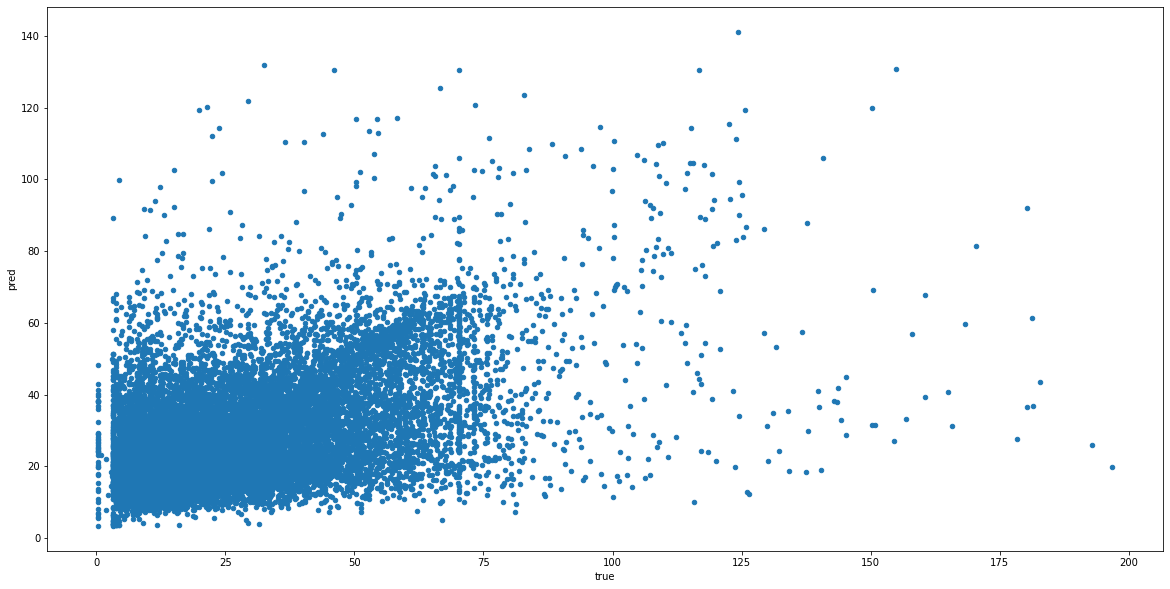

In [76]:
pred = pd.DataFrame(data=Y_pred.flatten())
Y_test = Y_test.reset_index(drop=True)
results = Y_test.join(pred, how='outer')
results = results.rename(columns={"total_amount": "true", 0: "pred"})
results.plot.scatter(x='true', y='pred', figsize=(20,10))

#### Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gboost = GradientBoostingRegressor()
gboost.fit(X_train,np.ravel(Y_train))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
gboost_model = gboost
Y_pred = gboost_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean absolute error:', mean_absolute_error(Y_test, Y_pred))
print('Mean squared error:', mean_squared_error(Y_test, Y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(Y_test, Y_pred)))
print('r2 score:', r2_score(Y_test, Y_pred))

Mean absolute error: 8.314411268931229
Mean squared error: 174.2252570489269
Root mean squared error: 13.19944154307018
r2 score: 0.36776659867137496


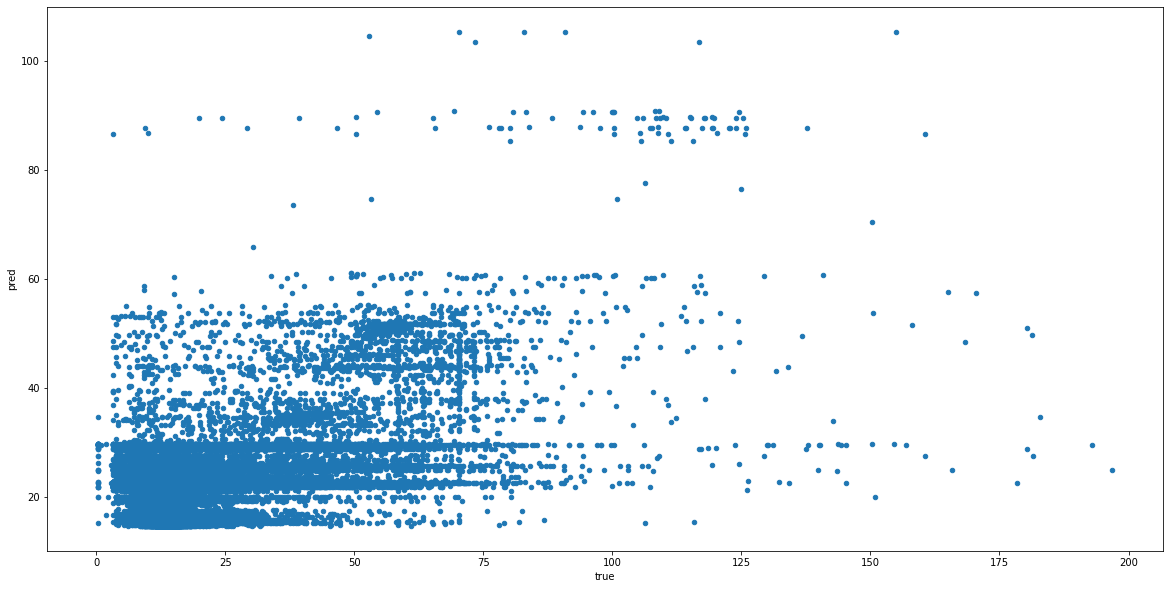

In [79]:
pred = pd.DataFrame(data=Y_pred.flatten())
Y_test = Y_test.reset_index(drop=True)
results = Y_test.join(pred, how='outer')
results = results.rename(columns={"total_amount": "true", 0: "pred"})
results.plot.scatter(x='true', y='pred', figsize=(20,10))

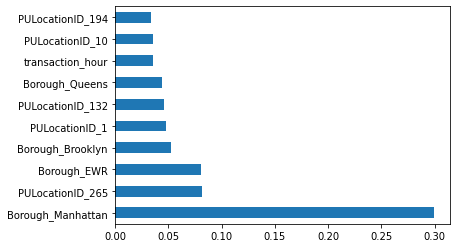

In [80]:
(pd.Series(gboost_model.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh'))

#### Comparing the Model Performance

In [81]:
 decision_tree = {'Mean absolute error': 8.21119295288444,'Mean squared error': 177.82001056450343,
                  'Root mean squared error': 13.334916968789248,'r2 score': 0.3547218583129047}


benchmark_model = {'Mean absolute error': 9.758367222250977, 'Mean squared error': 216.19007815954183,
                   'Root mean squared error': 14.703403624995875,'r2 score': 0.21548350242970526}

random_forest = {'Mean absolute error': 7.5449436059979575,'Mean squared error': 181.311196464487,
                 'Root mean squared error': 13.465184605659404,'r2 score': 0.3420529469644352}

g_boost = {'Mean absolute error': 8.314411268931227,'Mean squared error': 174.2252570489269,
           'Root mean squared error': 13.19944154307018,'r2 score': 0.36776659867137496}

dfs = pd.DataFrame([benchmark_model, decision_tree, random_forest, g_boost], index=['benchmark_model', 'decision_tree', 'random_forest', 'gradient_boosting'])
dfs

,Mean absolute error,Mean squared error,Root mean squared error,r2 score
benchmark_model,9.758367,216.190078,14.703404,0.215484
decision_tree,8.211193,177.820011,13.334917,0.354722
random_forest,7.544944,181.311196,13.465185,0.342053
gradient_boosting,8.314411,174.225257,13.199442,0.367767


## 7. Model Tuning

###### I selected the gradient boosting regressor as my model for tuning using several hyperparameters

In [82]:
# number of estimators
#n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# maximum features
#max_features = ['auto', 'sqrt', 'log2']

# learning rate
#learning_rate = [0.1, 0.05, 0.025, 0.2]

# maximum depth
#max_depth = [3, 4, 5, 6, 7, 8, 9, 10]

# minimum split sample
#min_samples_split = [2, 5, 10, 20, 40]

# minimum leaf sample
#min_samples_leaf = [1, 2, 4, 10, 20]

#param_grid= {'n_estimators': n_estimators, 'learning_rate': learning_rate,'max_depth': max_depth, 
#'min_samples_leaf': min_samples_leaf, 'max_features': max_features, 'min_samples_split': min_samples_split}

In [83]:
#from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
#from sklearn.model_selection import RandomizedSearchCV   #Perforing grid search

#gbr = GradientBoostingRegressor()
# use random grid to search for best parameter
# random search of parameters using 3 fold cross validation
#random_search = RandomizedSearchCV(estimator = gbr, param_distributions= param_grid, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

#random_search.fit(X_train, Y_train)

#performances = pd.DataFrame.from_dict(random_search.cv_results_)

In [84]:
#performances

###### The chunk of code above takes about an hour to train on all selected hyperparameters. I selected the two best hyperparameters and compared them individually below

#### Deciding on best model to go with

In [85]:
import time
t0 = time.time()

best = GradientBoostingRegressor(n_estimators=1000, max_features='log2', min_samples_split=5,
                                 min_samples_leaf=20, learning_rate=0.05, max_depth=10)
best.fit(X_train, Y_train)
t1 = time.time()

print('Time elapsed:', t1 - t0, 'seconds')

Y_pred = best.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print('Mean absolute error:', mean_absolute_error(Y_test, Y_pred))
print('Mean squared error:', mean_squared_error(Y_test, Y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('r2 score:', r2_score(Y_test, Y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time elapsed: 49.38437747955322 seconds
Mean absolute error: 7.1608026727659775
Mean squared error: 154.08268003866922
Root mean squared error: 12.413004472675793
r2 score: 0.44086053574126094


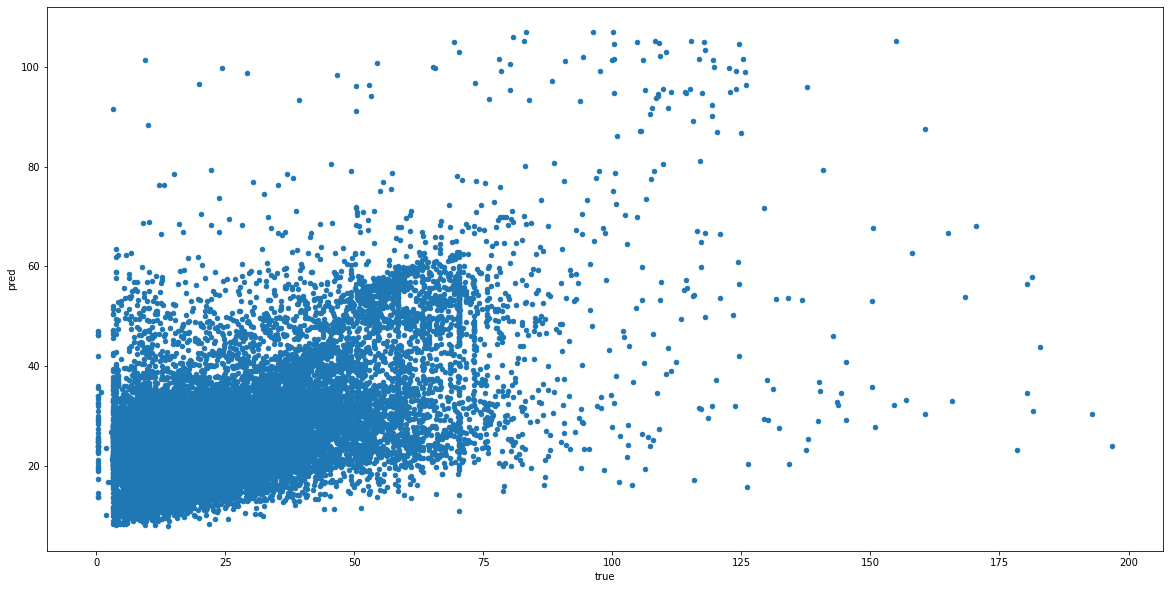

In [86]:
pred = pd.DataFrame(data=Y_pred.flatten())
Y_test = Y_test.reset_index(drop=True)
results = Y_test.join(pred, how='outer')
results = results.rename(columns={"total_amount": "true", 0: "pred"})
results.plot.scatter(x='true', y='pred', figsize=(20,10))

In [87]:
import time
t0 = time.time()

best = GradientBoostingRegressor(n_estimators=200, max_features='auto', min_samples_split=5,
                                 min_samples_leaf=4, learning_rate=0.1, max_depth=4)
best.fit(X_train, Y_train)
t1 = time.time()

print('Time elapsed:', t1 - t0, 'seconds')

Y_pred = best.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print('Mean absolute error:', mean_absolute_error(Y_test, Y_pred))
print('Mean squared error:', mean_squared_error(Y_test, Y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('r2 score:', r2_score(Y_test, Y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time elapsed: 80.43922829627991 seconds
Mean absolute error: 7.721646637562674
Mean squared error: 161.70084151614992
Root mean squared error: 12.716164575694588
r2 score: 0.41321554198799737


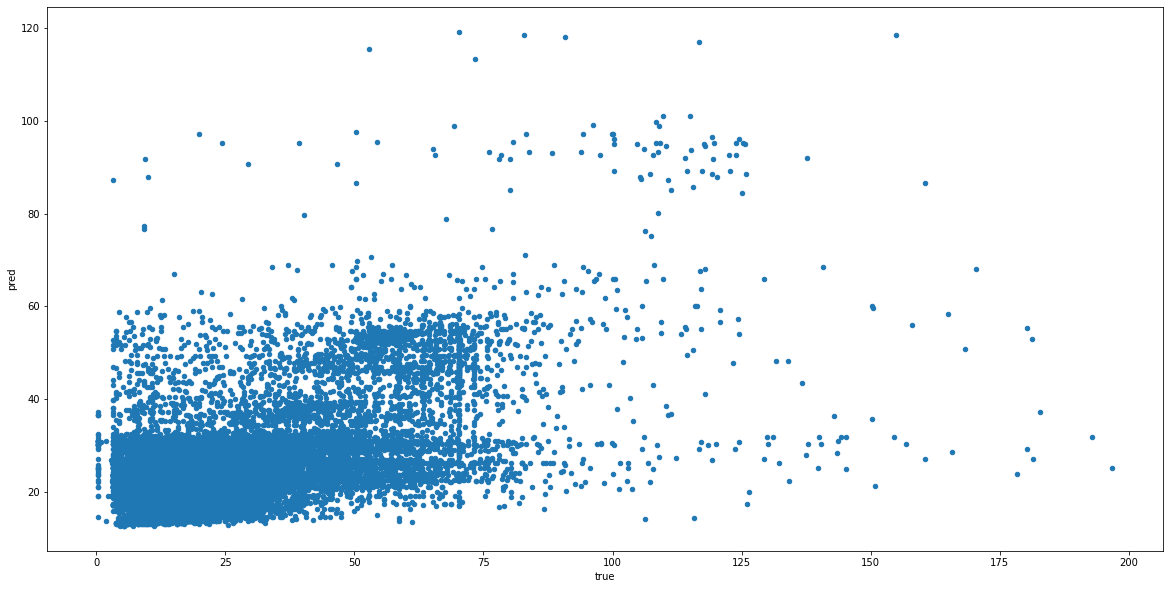

In [88]:
pred = pd.DataFrame(data=Y_pred.flatten())
Y_test = Y_test.reset_index(drop=True)
results = Y_test.join(pred, how='outer')
results = results.rename(columns={"total_amount": "true", 0: "pred"})
results.plot.scatter(x='true', y='pred', figsize=(20,10))

###### My best model is the first one. It completes in less time and  gives a better result. More work can still be done on the data to improve the performance